In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import string

In [2]:
true = pd.read_csv("True.csv")
false = pd.read_csv("Fake.csv")

In [3]:
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [4]:
false.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [5]:
true['category'] = 1
false['category'] = 0

In [6]:
news = pd.concat([true,false]) #Merging the 2 datasets

In [7]:
news.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  category  
0  December 31, 2017          1  
1  December 29, 2017          1  
2  December 31, 2017          1  
3  December 30, 2017          1  
4  December 29, 2017          1

In [8]:
news.isna().sum() # Checking for nan Values

title       0
text        0
subject     0
date        0
category    0
dtype: int64

/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


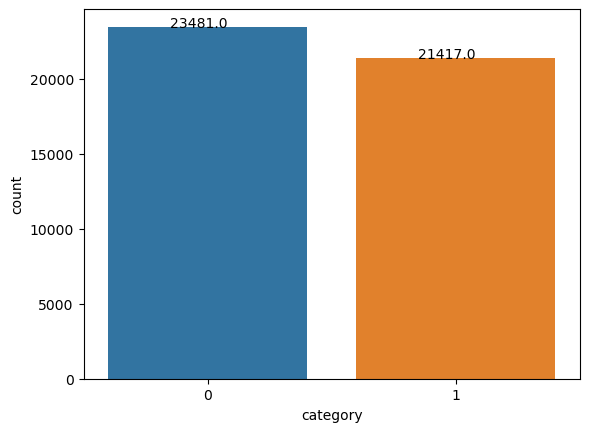

In [9]:
ax = sb.countplot(data=news, x=news["category"])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [10]:
print("Percentage of text containing Reuters:",true.text.str.contains("\(Reuters\)").mean()*100,"%")

Percentage of text containing Reuters: 99.20623803520567 %


In [11]:
# Removing all instances of '(Reuters)'
news['text'] = news['text'].replace('\(Reuters\)', '', regex=True)

# Removing all singular letters except 'a'
alphabet = list(string.ascii_lowercase)
alphabet = alphabet[1:]

for letter in alphabet:
    news['text'] = news['text'].replace(' '+letter+' ', ' ', regex=True)

# Expanding all words with contractions
news['text'] = news['text'].replace(' re ', ' are ', regex=True)
news['text'] = news['text'].replace(' ve ', ' have ', regex=True)
news['text'] = news['text'].replace(' ll ', ' will ', regex=True)
news['text'] = news['text'].replace('[^\w\s]+', '', regex=True)

# Removing all numbers
news['text'] = news['text'].str.replace(r'\d+', '',regex=True)

# Removing all extra spaces
news['text'] = news['text'].str.replace('\s+', ' ', regex=True)

# Converting all text and titles to lowercase
news['text']=news['text'].str.lower() 
news['title'] = news['title'].str.lower()
news

title  \
0      as u.s. budget fight looms, republicans flip t...   
1      u.s. military to accept transgender recruits o...   
2      senior u.s. republican senator: 'let mr. muell...   
3      fbi russia probe helped by australian diplomat...   
4      trump wants postal service to charge 'much mor...   
...                                                  ...   
23476  mcpain: john mccain furious that iran treated ...   
23477  justice? yahoo settles e-mail privacy class-ac...   
23478  sunnistan: us and allied ‘safe zone’ plan to t...   
23479  how to blow $700 million: al jazeera america f...   
23480  10 u.s. navy sailors held by iranian military ...   

                                                    text       subject  \
0      washington the head of a conservative republic...  politicsNews   
1      washington transgender people will be allowed ...  politicsNews   
2      washington the special counsel investigation o...  politicsNews   
3      washington trump campaign adviser george papad...  politicsNews   
4      seattlewashington president donald trump calle...  politicsNews   
...                                                  ...           ...   
23476  st century wire says as wire reported earlier ...   Middle-east   
23477  st century wire says it a familiar theme whene...   Middle-east   
23478  patrick henningsen st century wireremember whe...   Middle-east   
23479  st century wire says al jazeera america will g...   Middle-east   
23480  st century wire says as wire predicted in its ...   Middle-east   

                     date  category  
0      December 31, 2017          1  
1      December 29, 2017          1  
2      December 31, 2017          1  
3      December 30, 2017          1  
4      December 29, 2017          1  
...                   ...       ...  
23476    January 16, 2016         0  
23477    January 16, 2016         0  
23478    January 15, 2016         0  
23479    January 14, 2016         0  
23480    January 12, 2016         0  

[44898 rows x 5 columns]

In [12]:
print("Percentage of text containing Reuters:",news.text.str.contains("\(Reuters\)").mean()*100,"%")

Percentage of text containing Reuters: 0.0 %


In [13]:
#No missing date values in the dataset
missing_values = news[news['date'].isnull()]
print("Rows with missing date values:", missing_values)

Rows with missing date values: Empty DataFrame
Columns: [title, text, subject, date, category]
Index: []


In [14]:
tnews = pd.to_datetime(true.date,errors='coerce').value_counts().sort_index()
fnews = pd.to_datetime(false.date,errors='coerce').value_counts().sort_index()

plt.plot(tnews.index,tnews.values,label='Real',alpha=0.4)
plt.plot(fnews.index,fnews.values,'red',label='Fake',alpha=0.4)
plt.xticks(rotation=45)
plt.ylabel("Article Count")
plt.legend(loc='upper left')
plt.title("Articles published per day")

Text(0.5, 1.0, 'Articles published per day')

In [15]:
# We observe that there are 209 news that are duplicated, hence we will be dropping them.
news.duplicated().sum()
print("Before removing:")
news.describe()

Before removing:


category
count  44898.000000
mean       0.477015
std        0.499477
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000

In [16]:
news.drop_duplicates(inplace=True)
print("After removing:")
news.describe()

After removing:


category
count  44689.000000
mean       0.474636
std        0.499362
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000

In [17]:
news.title.count()

44689

In [18]:
news.subject.value_counts()

subject
politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [19]:
plt.figure(figsize = (12,8))
sb.set(style = "whitegrid",font_scale = 1.2)
chart = sb.countplot(x = "subject", hue = "category", data = news)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

In [20]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string

In [21]:
news['text'] = news['text'] + " " + news['title']
del news['title']
del news['subject']
del news['date']

In [22]:
# remove stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [23]:
#removing HTML tags from text
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


def remove_between_square_brackets(text):
    text = re.sub('\[[^]]*\]', '', text)#Removing the square brackets
    text = re.sub(r'http\S+', '', text)# Removing URL's
    return text

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
news['text']=news['text'].apply(denoise_text)

/var/folders/r7/szn_kr7n2xqb_bh84f2ytqkh0000gn/T/ipykernel_7644/1718937473.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [24]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(news[news.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Most Common Words (Text) For Real News', fontsize=50)
plt.show()

In [25]:
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(news[news.category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Most Common Words (Text) For Fake News', fontsize=50)
plt.show()

In [26]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=news[news['category']==1]['text'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Real text')
text_len=news[news['category']==0]['text'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
ax1.set_ylim([0, 25000])
ax2.set_ylim([0, 25000])
plt.show()


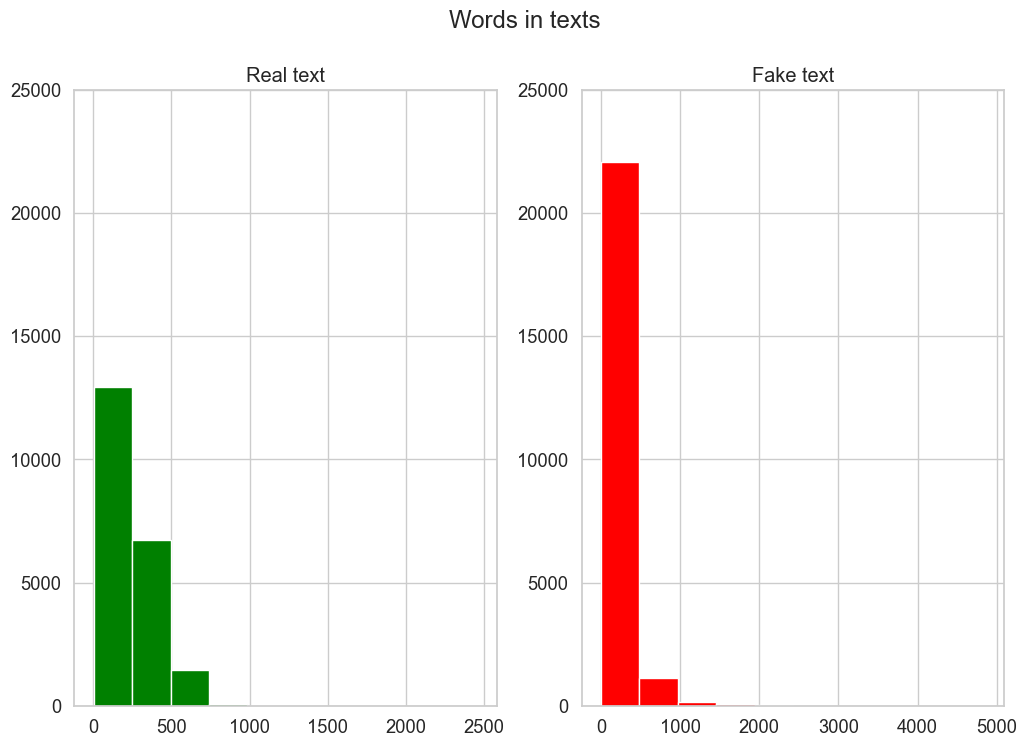

In [27]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=news[news['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Real text')
text_len=news[news['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')

ax1.set_ylim([0, 25000])
ax2.set_ylim([0, 25000])
plt.show()


/var/folders/r7/szn_kr7n2xqb_bh84f2ytqkh0000gn/T/ipykernel_7644/2883417931.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before 

(0.0, 1.5)

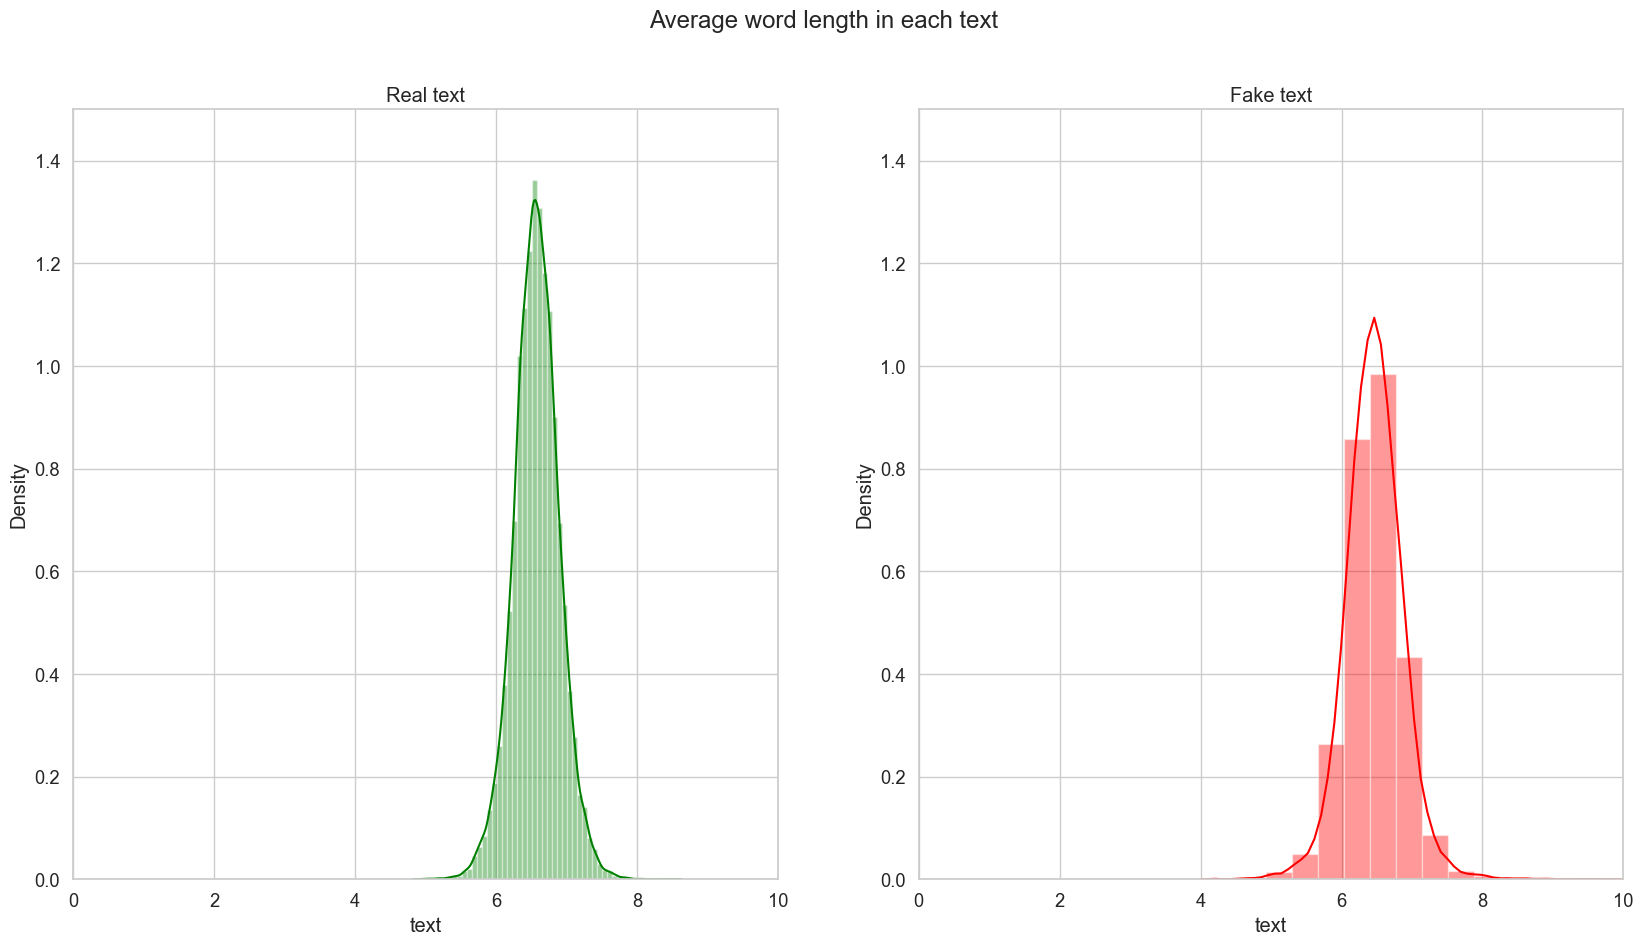

In [28]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=news[news['category']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sb.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Real text')
word=news[news['category']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sb.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')
#adjust scale to be equal
ax1.set_xlim(0,10)
ax2.set_xlim(0,10)
#adjust y axis to be equal
ax1.set_ylim(0,1.5)
ax2.set_ylim(0,1.5)

In [29]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(news.text)
corpus[:5]

['washington', 'head', 'conservative', 'republican', 'faction']

Counts frequency of words, displays top 10

In [30]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'said': 129059,
 'trump': 127038,
 'us': 63272,
 'would': 55061,
 'president': 52252,
 'people': 41390,
 'one': 36093,
 'new': 32519,
 'state': 32043,
 'also': 31031}

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) in

<Axes: >

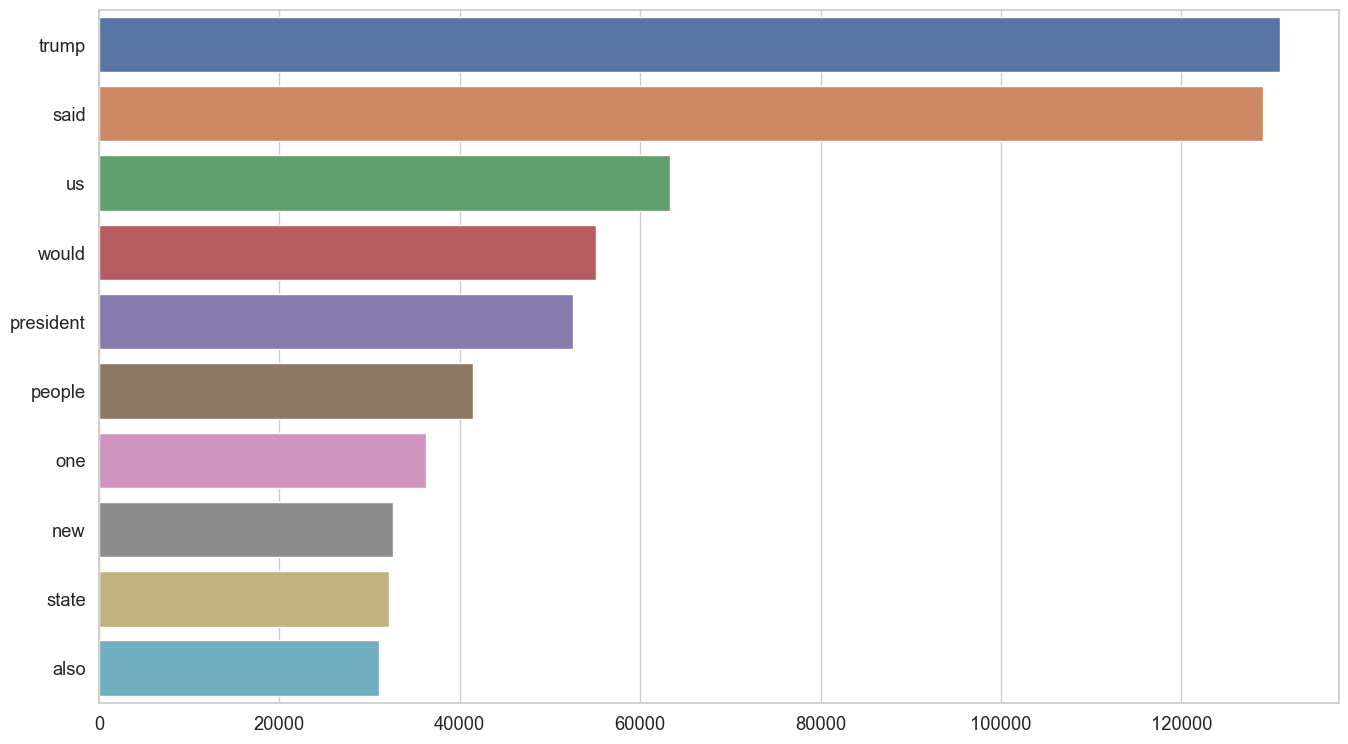

In [32]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(news.text,10,1)
most_common_uni = dict(most_common_uni)
sb.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

Most common bi-grams(2 words)

/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) in

<Axes: >

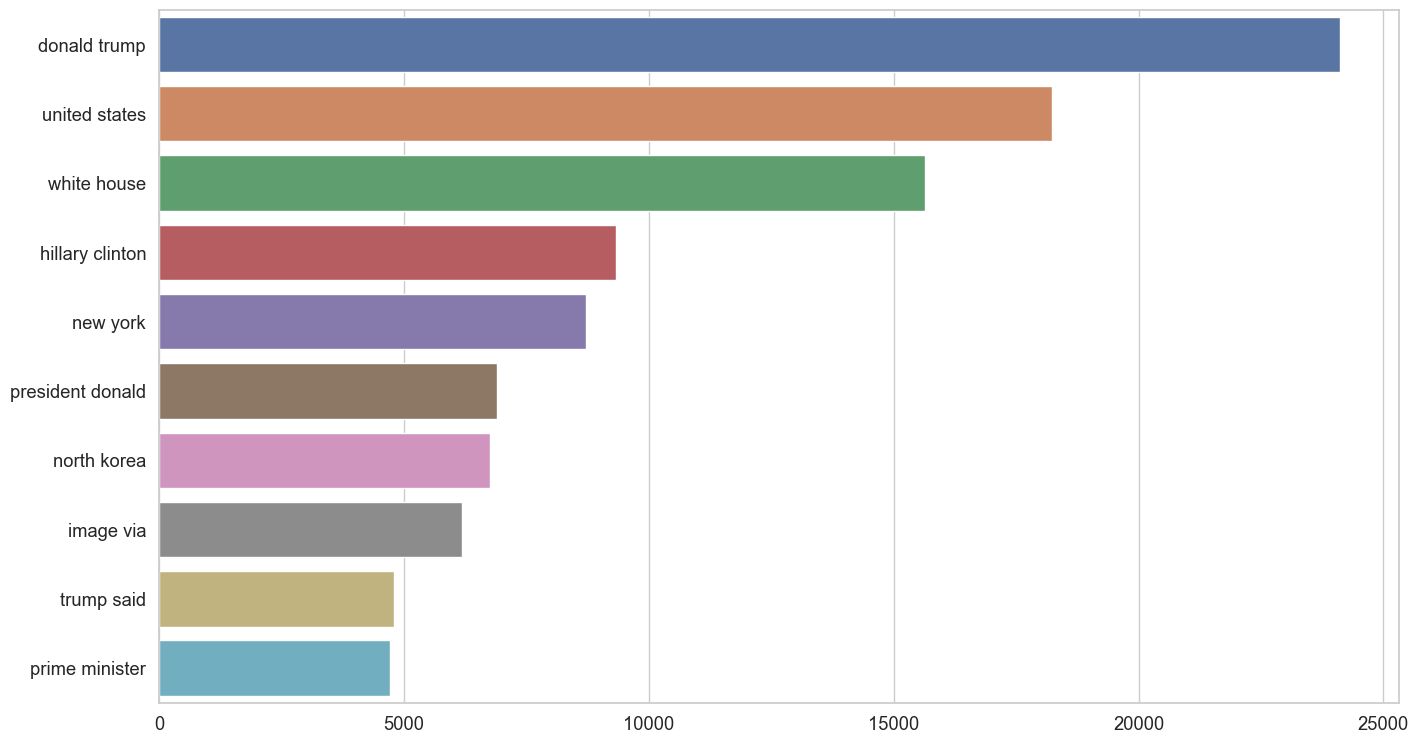

In [33]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(news.text,10,2)
most_common_bi = dict(most_common_bi)
sb.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

3-grams (3 words)

/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/calvin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) in

<Axes: >

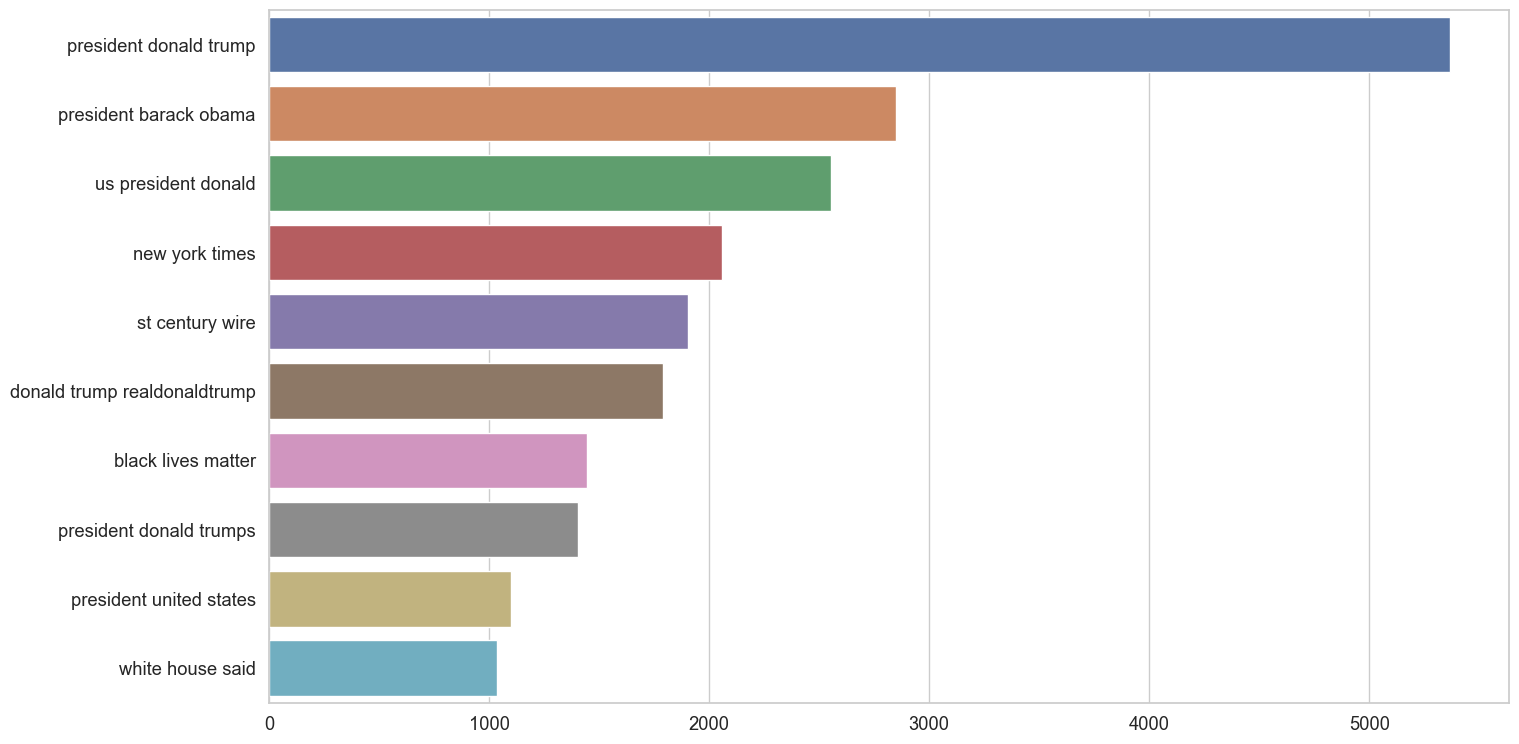

In [34]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(news.text,10,3)
most_common_tri = dict(most_common_tri)
sb.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

# Vectorize using Tfidf

/Users/calvin/anaconda3/lib/python3.11/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Model: Logistic Regression
Accuracy: 0.9838890132020586
Confusion Matrix:
[[4582   66]
 [  78 4212]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4648
           1       0.98      0.98      0.98      4290

    accuracy                           0.98      8938
   macro avg       0.98      0.98      0.98      8938
weighted avg       0.98      0.98      0.98      8938



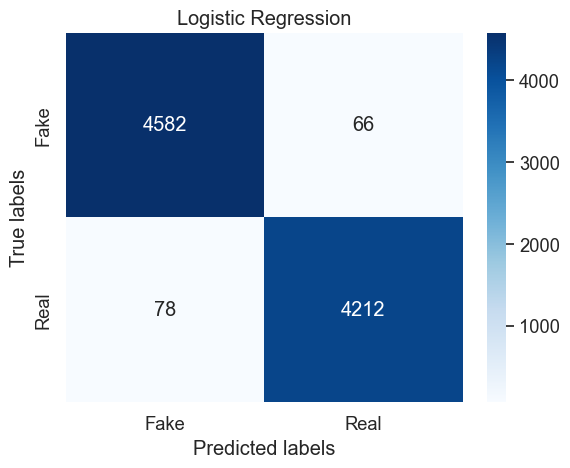



Model: Naive Bayes
Accuracy: 0.939136272096666
Confusion Matrix:
[[4382  266]
 [ 278 4012]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4648
           1       0.94      0.94      0.94      4290

    accuracy                           0.94      8938
   macro avg       0.94      0.94      0.94      8938
weighted avg       0.94      0.94      0.94      8938



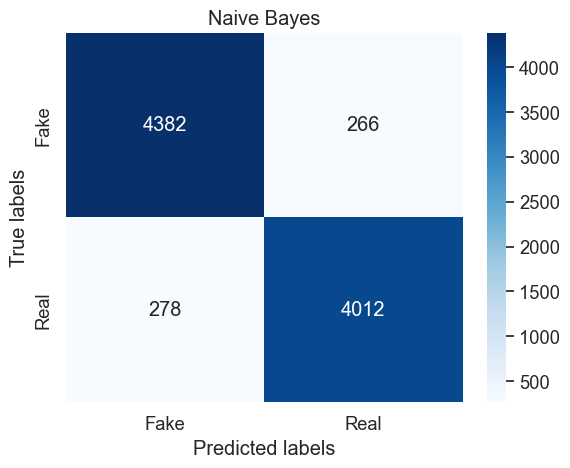



Model: Random Forest
Accuracy: 0.9882524054598344
Confusion Matrix:
[[4592   56]
 [  49 4241]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4648
           1       0.99      0.99      0.99      4290

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



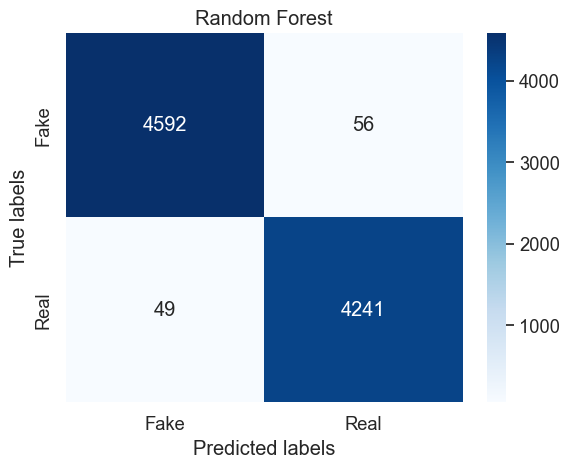



Model: Passive Aggressive
Accuracy: 0.990713806220631
Confusion Matrix:
[[4620   28]
 [  55 4235]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4648
           1       0.99      0.99      0.99      4290

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



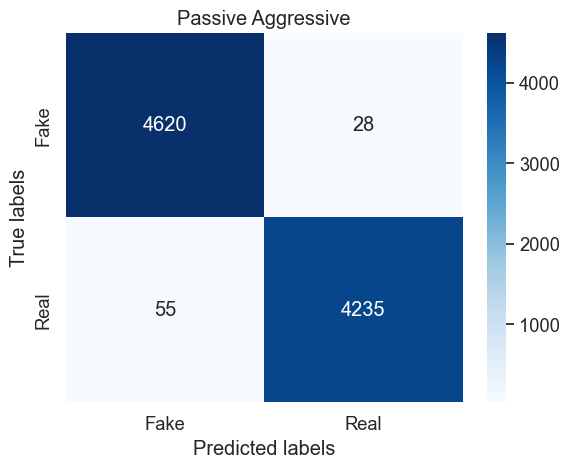



Model: XGBoost
Accuracy: 0.9916088610427388
Confusion Matrix:
[[4619   29]
 [  46 4244]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4648
           1       0.99      0.99      0.99      4290

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



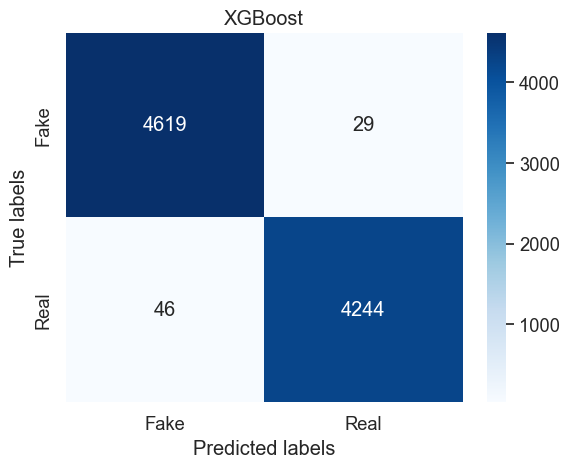

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

# Split the data into training and testing sets
X = news['text']
y = news['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Passive Aggressive': PassiveAggressiveClassifier(max_iter=1000, random_state=42),
    'XGBoost': xgb.XGBClassifier()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    results[model_name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': confusion,
        'Classification Report': classification_report(y_test, y_pred)
    }

# Print results for each model
for model_name, metrics in results.items():
    print(f'Model: {model_name}')
    print(f'Accuracy: {metrics["Accuracy"]}')
    print('Confusion Matrix:')
    print(metrics['Confusion Matrix'])
    print('Classification Report:')
    print(metrics['Classification Report'])
    #print confusion matrix with label of model
    cm = metrics['Confusion Matrix']
    ax= plt.subplot()
    sb.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")
    ax.set_title(model_name)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.xaxis.set_ticklabels(['Fake', 'Real'])
    ax.yaxis.set_ticklabels(['Fake', 'Real'])
    plt.show()
    
    print('\n')


# Tokenize using countvectorizer

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
# Example usage
count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Initialize and train the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Passive Aggressive': PassiveAggressiveClassifier(max_iter=1000, random_state=42),
    'XGBoost': xgb.XGBClassifier()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train_count, y_train)
    y_pred = model.predict(X_test_count)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    results[model_name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': confusion,
        'Classification Report': classification_report(y_test, y_pred)
    }

# Print results for each model
for model_name, metrics in results.items():
    print(f'Model: {model_name}')
    print(f'Accuracy: {metrics["Accuracy"]}')
    print('Confusion Matrix:')
    print(metrics['Confusion Matrix'])
    print('Classification Report:')
    print(metrics['Classification Report'])
    print('\n')


/Users/calvin/anaconda3/lib/python3.11/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Model: Logistic Regression
Accuracy: 0.9897068695457597
Confusion Matrix:
[[4622   26]
 [  66 4224]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4648
           1       0.99      0.98      0.99      4290

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



Model: Naive Bayes
Accuracy: 0.9486462295815619
Confusion Matrix:
[[4413  235]
 [ 224 4066]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4648
           1       0.95      0.95      0.95      4290

    accuracy                           0.95      8938
   macro avg       0.95      0.95      0.95      8938
weighted avg       0.95      0.95      0.95      8938



Model: Random Forest
Accuracy: 0.9882524054598344
Confusion Matrix:
[[4592   56]
 [  49 4241]]
Classif

# Vectorize using n-grams

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

# Example usage with bigrams
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_ngram = ngram_vectorizer.fit_transform(X_train)
X_test_ngram = ngram_vectorizer.transform(X_test)

# Initialize and train the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Passive Aggressive': PassiveAggressiveClassifier(max_iter=1000, random_state=42),
    'XGBoost': xgb.XGBClassifier()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train_ngram, y_train)
    y_pred = model.predict(X_test_ngram)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    results[model_name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': confusion,
        'Classification Report': classification_report(y_test, y_pred)
    }

# Print results for each model
for model_name, metrics in results.items():
    print(f'Model: {model_name}')
    print(f'Accuracy: {metrics["Accuracy"]}')
    print('Confusion Matrix:')
    print(metrics['Confusion Matrix'])
    print('Classification Report:')
    print(metrics['Classification Report'])
    print('\n')


/Users/calvin/anaconda3/lib/python3.11/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Model: Logistic Regression
Accuracy: 0.9911613336316849
Confusion Matrix:
[[4626   22]
 [  57 4233]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4648
           1       0.99      0.99      0.99      4290

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



Model: Naive Bayes
Accuracy: 0.957484895949877
Confusion Matrix:
[[4442  206]
 [ 174 4116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4648
           1       0.95      0.96      0.96      4290

    accuracy                           0.96      8938
   macro avg       0.96      0.96      0.96      8938
weighted avg       0.96      0.96      0.96      8938



Model: Random Forest
Accuracy: 0.9899306332512866
Confusion Matrix:
[[4594   54]
 [  36 4254]]
Classifi